In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from train_utils import train, test
import matplotlib.pyplot as plt
from test_fun import train,test,main

In [29]:
'''train_dataset = datasets.CIFAR10('./data/cifar', train=True, 
                                download=True,
                                transform=transforms.ToTensor())
test_dataset = datasets.CIFAR10('./data/cifar', train=False,
                               transform=transforms.ToTensor())

print("training set{},test set{} \n".format(
    len(train_dataset),len(test_dataset)))'''

'train_dataset = datasets.CIFAR10(\'./data/cifar\', train=True, \n                                download=True,\n                                transform=transforms.ToTensor())\ntest_dataset = datasets.CIFAR10(\'./data/cifar\', train=False,\n                               transform=transforms.ToTensor())\n\nprint("training set{},test set{} \n".format(\n    len(train_dataset),len(test_dataset)))'

In [32]:
train_dataset = datasets.CIFAR10('./data/cifar', train=True, 
                                download=False,
                                transform=transforms.ToTensor())
test_dataset = datasets.CIFAR10('./data/cifar', train=False,
                               transform=transforms.ToTensor())

print("training set:{},test set:{}\n".format(
    len(train_dataset),len(test_dataset)))

training set:50000,test set:10000



Target:horse
Size of Image:torch.Size([3, 32, 32])


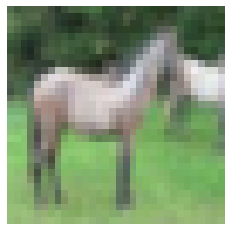

In [5]:
classes = ('plane','car','bird','cat','deer',
          'dog','frog','horse','ship','truck')

idx = torch.randint(0,len(train_dataset),(1,)).item()
random_image = train_dataset[idx][0]
target_num = train_dataset[idx][1]

print('Target:{}'.format(classes[target_num]))
print('Size of Image:{}'.format(random_image.size()))

plt.imshow(random_image.numpy().transpose(1,2,0))
plt.axis("off")
plt.show()

In [14]:
BATCH = 128
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(DEVICE)
STEP = 50
PRINT_STEP = 180

cuda


In [7]:
train_loader = DataLoader(train_dataset,batch_size=BATCH,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=BATCH,shuffle=True)

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.flatten = lambda x: x.view(x.size(0), -1)
        
        self.conv1 = nn.Conv2d(in_channels = 3,
                               out_channels=8,
                               kernel_size=5,
                               stride=1,
                               padding=1)
        self.conv2 = nn.Conv2d(in_channels=8,
                             out_channels=16,
                             kernel_size=2,
                             stride=1,
                             padding=0)
        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(kernel_size=2,
                                stride=2)
        self.fc = nn.Linear(16*7*7, 10)
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.flatten(x)
        x = self.fc(x)
        
        return x
        

In [9]:
model = CNN().to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [10]:
model.parameters

<bound method Module.parameters of CNN(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1))
  (relu): ReLU(inplace=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=784, out_features=10, bias=True)
)>

In [11]:
num_params = 0 
for params in model.parameters():
    num_params += params.view(-1).size(0)
print('Total number of parameters:{}'.format(num_params))

Total number of parameters:8986


In [15]:
main(model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    loss_func=loss_function,
    optimizer=optimizer,
    n_step=STEP,
    device=DEVICE,
    save_path='cifar10_model.pt',
    print_step=PRINT_STEP)

Train Step: 1 (00.00%)  	Loss: 1.1300
Train Step: 1 (46.08%)  	Loss: 1.0679
Train Step: 1 (92.16%)  	Loss: 0.8747
Test Set: Average loss:1.1071,Accuracy:6169/10000(61.69%)

Train Step: 2 (00.00%)  	Loss: 1.0021
Train Step: 2 (46.08%)  	Loss: 0.7712
Train Step: 2 (92.16%)  	Loss: 0.9786
Test Set: Average loss:1.0958,Accuracy:6215/10000(62.15%)
discard previous state, best model state saved!

Train Step: 3 (00.00%)  	Loss: 1.0799
Train Step: 3 (46.08%)  	Loss: 0.6906
Train Step: 3 (92.16%)  	Loss: 1.0739
Test Set: Average loss:1.0950,Accuracy:6224/10000(62.24%)
discard previous state, best model state saved!

Train Step: 4 (00.00%)  	Loss: 0.9998
Train Step: 4 (46.08%)  	Loss: 1.1573
Train Step: 4 (92.16%)  	Loss: 0.9333
Test Set: Average loss:1.0900,Accuracy:6243/10000(62.43%)
discard previous state, best model state saved!

Train Step: 5 (00.00%)  	Loss: 0.9012
Train Step: 5 (46.08%)  	Loss: 0.9418
Train Step: 5 (92.16%)  	Loss: 0.9467
Test Set: Average loss:1.0828,Accuracy:6261/10000(

Train Step: 44 (46.08%)  	Loss: 0.8010
Train Step: 44 (92.16%)  	Loss: 0.8391
Test Set: Average loss:1.0517,Accuracy:6384/10000(63.84%)

Train Step: 45 (00.00%)  	Loss: 0.9212
Train Step: 45 (46.08%)  	Loss: 0.8821
Train Step: 45 (92.16%)  	Loss: 0.9179
Test Set: Average loss:1.0441,Accuracy:6446/10000(64.46%)
discard previous state, best model state saved!

Train Step: 46 (00.00%)  	Loss: 0.8419
Train Step: 46 (46.08%)  	Loss: 0.8667
Train Step: 46 (92.16%)  	Loss: 0.7726
Test Set: Average loss:1.0376,Accuracy:6451/10000(64.51%)
discard previous state, best model state saved!

Train Step: 47 (00.00%)  	Loss: 0.8412
Train Step: 47 (46.08%)  	Loss: 0.7481
Train Step: 47 (92.16%)  	Loss: 0.9122
Test Set: Average loss:1.0341,Accuracy:6450/10000(64.50%)

Train Step: 48 (00.00%)  	Loss: 0.7965
Train Step: 48 (46.08%)  	Loss: 0.9544
Train Step: 48 (92.16%)  	Loss: 0.8830
Test Set: Average loss:1.0326,Accuracy:6461/10000(64.61%)
discard previous state, best model state saved!

Train Step: 49 

In [16]:
model_path = './cifar10_model.pt'
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

### Predict accuracy according to class

In [24]:
def cal_correct_by_class(model,test_loader,device):
    total = torch.zeros(10)
    correct = torch.zeros(10)
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data.to(device))
            pred = output.cpu().softmax(1).argmax(1)
            correct_idx = pred.masked_select((pred==target))
            correct += torch.zeros(correct_idx.size(0),10)\
                                  .scatter(1,correct_idx.view(-1,1),1).sum(0)
            total += torch.zeros(target.size(0),10).scatter(
                1,target.view(-1,1),1).sum(0)
            
    percentage = correct/total
    return percentage

In [28]:
percentage = cal_correct_by_class(model,test_loader,DEVICE)
for cls_name,percent in zip(classes,percentage):
    print('{} \t:{:05.2f}%'.format(cls_name,percent*100))

plane 	:73.30%
car 	:76.70%
bird 	:51.20%
cat 	:43.00%
deer 	:57.30%
dog 	:56.60%
frog 	:74.70%
horse 	:68.80%
ship 	:79.00%
truck 	:72.60%
